Data Description:
                 A           B           C           D           E           F
count  123.000000  123.000000  123.000000  123.000000  123.000000  123.000000
mean    17.772358    0.403659    0.136260    0.645203    0.841138    0.141789
std      4.517385    0.133897    0.060101    0.169794    0.083942    0.080674
min      6.000000    0.140000    0.000000    0.260000    0.580000    0.020000
25%     16.000000    0.320000    0.095000    0.505000    0.780000    0.080000
50%     18.000000    0.380000    0.130000    0.640000    0.840000    0.130000
75%     20.000000    0.460000    0.180000    0.785000    0.910000    0.170000
max     31.000000    0.950000    0.310000    0.960000    0.980000    0.410000
          A         B         C         D         E         F
A  1.000000 -0.691900  0.414978 -0.604574 -0.521985 -0.549244
B -0.691900  1.000000 -0.581516  0.487248  0.376735  0.540427
C  0.414978 -0.581516  1.000000  0.017023  0.055766 -0.175102
D -0.604574  0.487248  0.017023

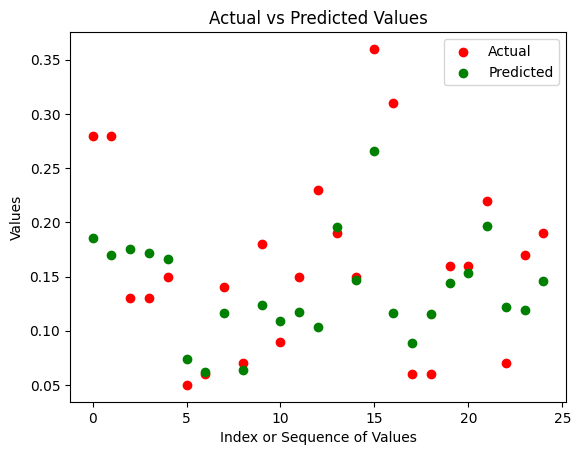

In [35]:
# Download the data using wget
#!wget "https://www.dropbox.com/s/veak3ugc4wj9luz/Alumni%20Giving%20Regression%20%28Edited%2 9.csv"

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas as pd
import csv
import matplotlib.pyplot as plt


np.random.seed(7)
df = pd.read_csv("Alumni Giving Regression.csv", delimiter="," )
dd_df_1 = df.head()



# Describing the data
data_description = df.describe()
print("Data Description:\n", data_description)

#Commpute Correlation

corr=df.corr(method = 'pearson')
corr
print(corr)

# In-Lab Task5
#Splitting Datasets
# Y_POSITION is set to 5, indicating that the target variable is in the 5th column
Y_POSITION = 5

# model_1_features is created as a list containing the indices [0, 1, 2, 3, 4],
# representing the columns from 0 to 4 (excluding 5).
model_1_features = [i for i in range(0, Y_POSITION)]

# Extract features (X) and target variable (Y) from the DataFrame (df)
X = df.iloc[:, model_1_features]
Y = df.iloc[:, Y_POSITION]

# Create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)

# In-Lab Task6
#Linear Regression
from sklearn.linear_model import LinearRegression


# Assuming df is our dataframe

# Y_POSITION is set to 5, indicating that the target variable is in the 5th column of the DataFrame.
Y_POSITION = 5

# model_1_features is created as a list containing the indices [0, 1, 2, 3, 4], representing the columns from 0 to 4 (excluding 5).
model_1_features = [i for i in range(0, Y_POSITION)]

# Extract features (X) and target variable (Y) from the DataFrame (df)
X = df.iloc[:, model_1_features]
Y = df.iloc[:, Y_POSITION]

# Create train/test split,given that we took testing dataset as 20% and radnom state to be 2020 to generate reproduceability
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)

# Model 1: Linear Regression
model1 = LinearRegression()

# Train the model
model1.fit(X_train, y_train)

# Predictions on the training set
y_pred_train1 = model1.predict(X_train)
RMSE_train1 = mean_squared_error(y_train, y_pred_train1)

# Predictions on the testing set
y_pred1 = model1.predict(X_test)
RMSE_test1 = mean_squared_error(y_test, y_pred1)

# Display RMSE for both training and testing sets
print("Regression Train set: RMSE {}".format(RMSE_train1))
print("Regression Test set: RMSE {}".format(RMSE_test1))

# Display coefficients
coef_dict = {}
for coef, feat in zip(model1.coef_, model_1_features):
    coef_dict[df.columns[feat]] = coef
print("Coefficients:", coef_dict)

# Scatter plot of actual vs predicted values
x_values = np.arange(len(y_test))
plt.scatter(x_values, y_test, color='red', label='Actual')
plt.scatter(x_values, y_pred1, color='green', label='Predicted')
plt.xlabel('Index or Sequence of Values')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()